# Customer Conversion Prediction

**Problem Statement
You are working for a new-age insurance company and employ
multiple outreach plans to sell term insurance to your
customers. Telephonic marketing campaigns still remain one of
the most effective ways to reach out to people however they
incur a lot of cost. Hence, it is important to identify the
customers that are most likely to convert beforehand so that
they can be specifically targeted via call. We are given the
historical marketing data of the insurance company and are
required to build a ML model that will predict if a client will
subscribe to the insurance.**

### Let's start by loading the data and exploring its structure and contents.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel('/kaggle/input/ccp-log-knn/Customer Conversion Prediction.xlsx')

In [2]:
data.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58.0,management,married,tertiary,unknown,5.0,may,261.0,1.0,unknown,no
1,44.0,technician,single,secondary,unknown,5.0,may,151.0,1.0,unknown,no
2,33.0,entrepreneur,married,secondary,unknown,5.0,may,76.0,1.0,unknown,no
3,47.0,blue-collar,married,unknown,unknown,5.0,may,92.0,1.0,unknown,no
4,33.0,unknown,single,unknown,unknown,5.0,may,198.0,1.0,unknown,no


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             45211 non-null  float64
 1   job             45211 non-null  object 
 2   marital         45211 non-null  object 
 3   education_qual  45211 non-null  object 
 4   call_type       45211 non-null  object 
 5   day             45211 non-null  float64
 6   mon             45211 non-null  object 
 7   dur             45211 non-null  float64
 8   num_calls       45211 non-null  float64
 9   prev_outcome    45211 non-null  object 
 10  y               45211 non-null  object 
dtypes: float64(4), object(7)
memory usage: 3.8+ MB


In [4]:
data.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


### EDA
### Let we visualise the data to explore more about features

In [5]:
# Checking the distribution of the target variable
data['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

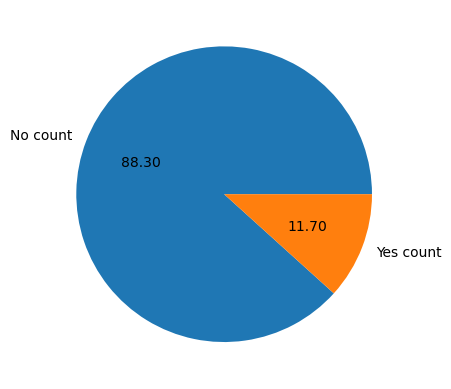

In [6]:
plt.figure()
plt.pie(data['y'].value_counts(),labels=['No count','Yes count'],autopct='%.2f')
plt.show()

#### Checking the distribution of the categorical features

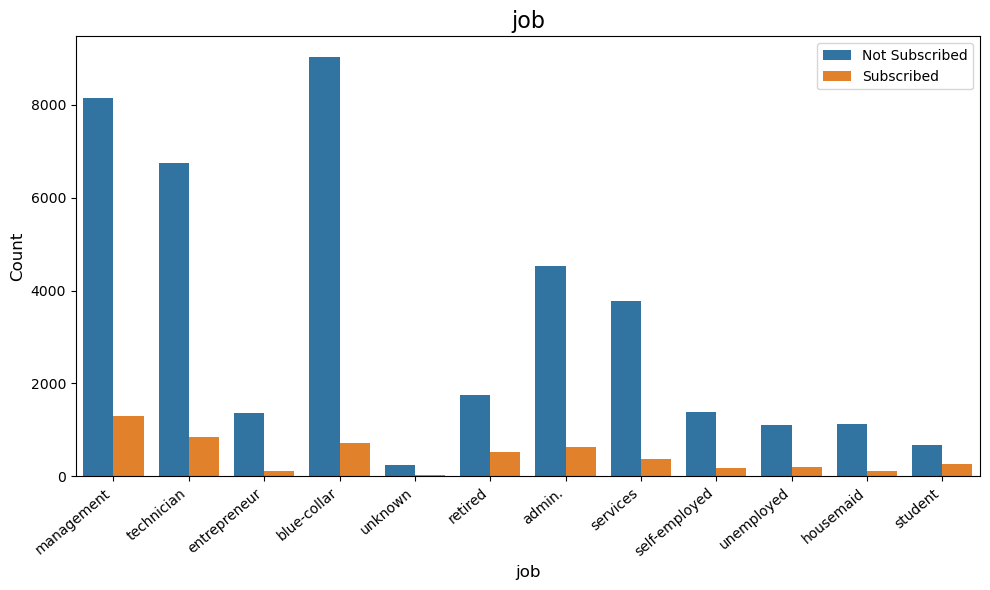

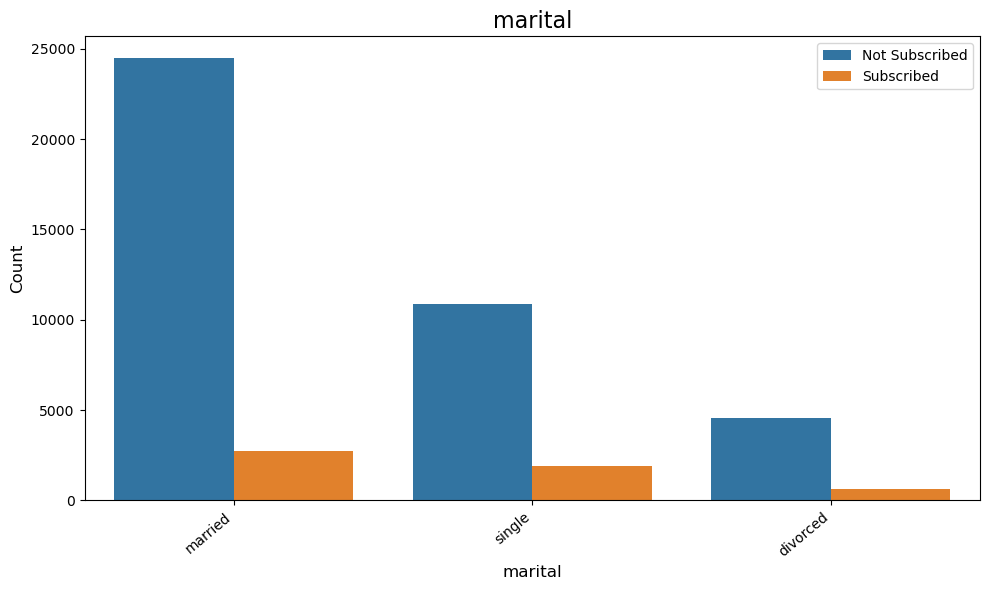

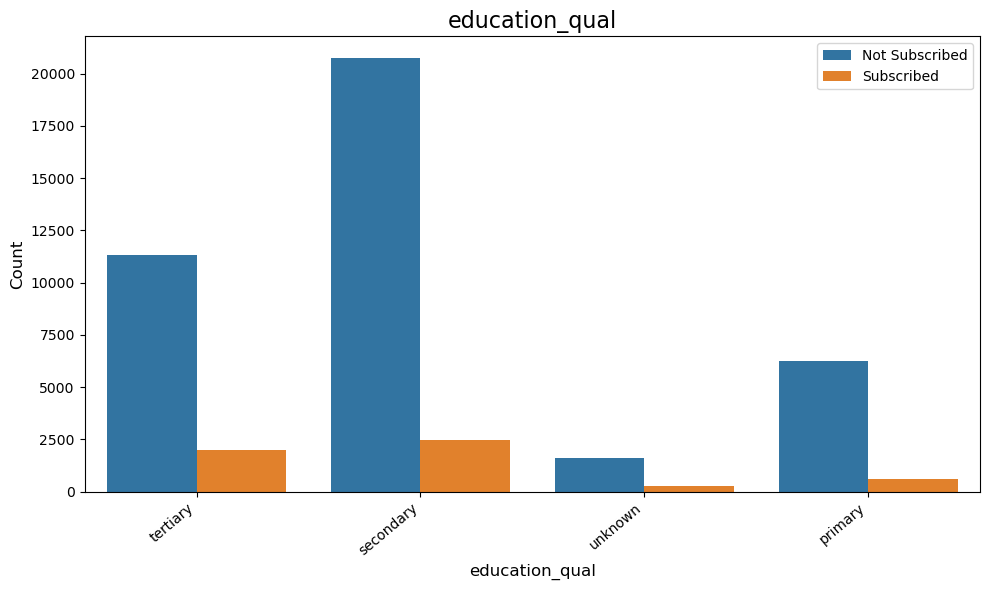

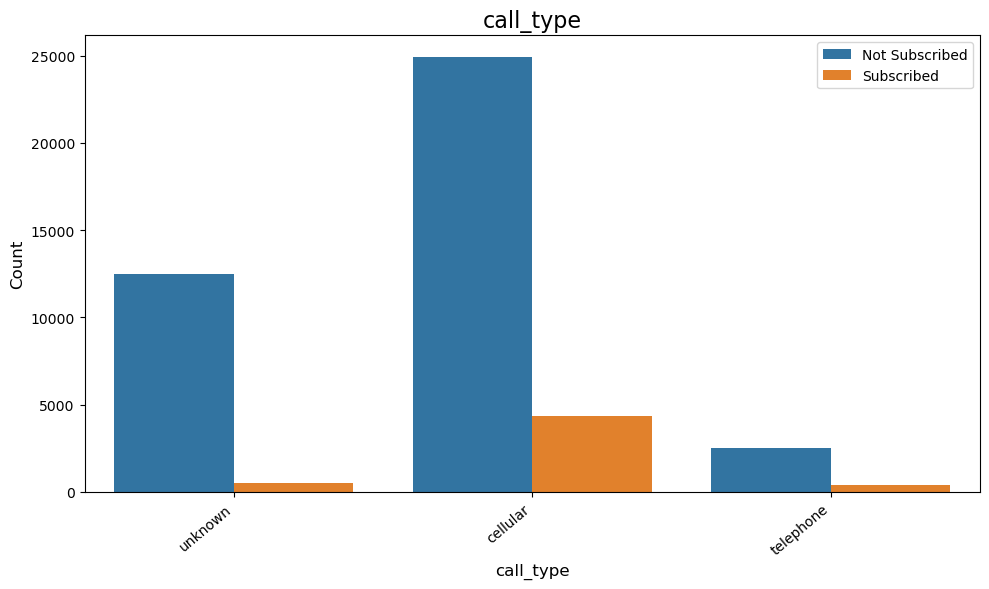

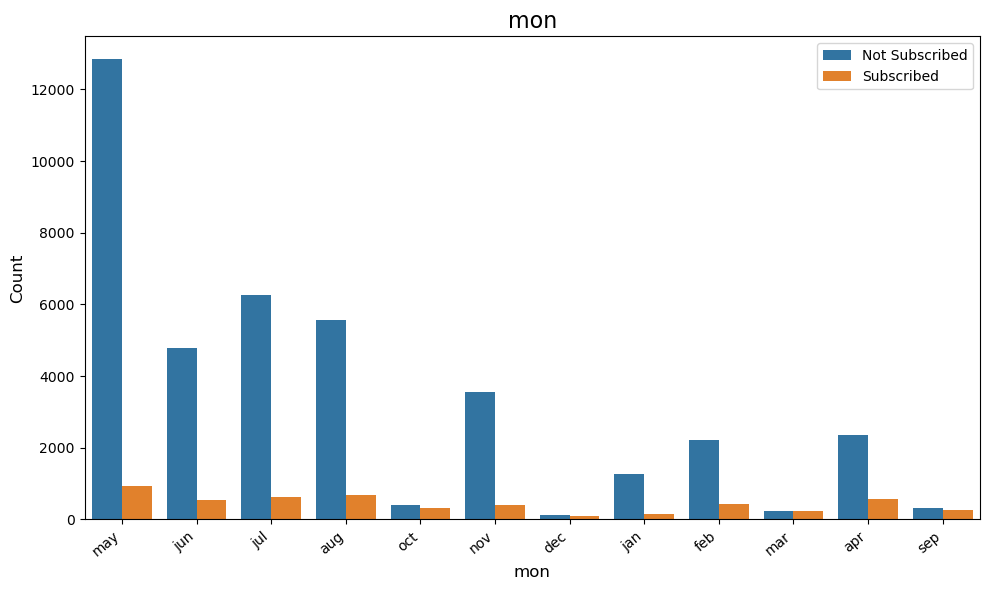

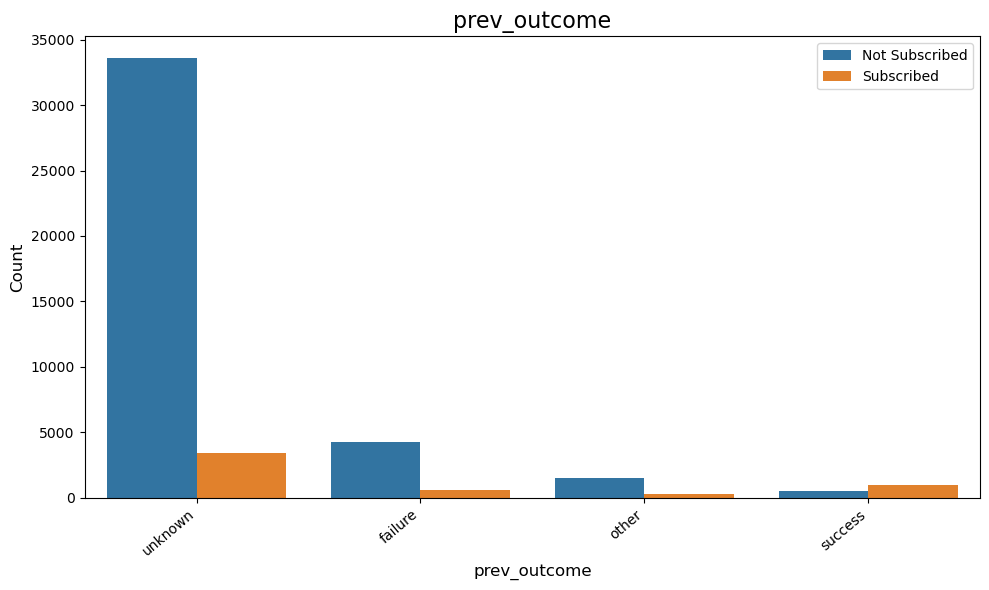

In [7]:
for feature in ['job', 'marital','education_qual', 'call_type','mon','prev_outcome']:
    plt.figure(figsize=(10,6))
    an = sns.countplot(x=feature, hue='y', data=data)
    plt.title(feature, fontsize=16)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.legend(["Not Subscribed", "Subscribed"])
    an.set_xticklabels(an.get_xticklabels(), rotation=40, ha="right")
    plt.tight_layout()
    plt.show()

#### Checking the distribution of the numerical features

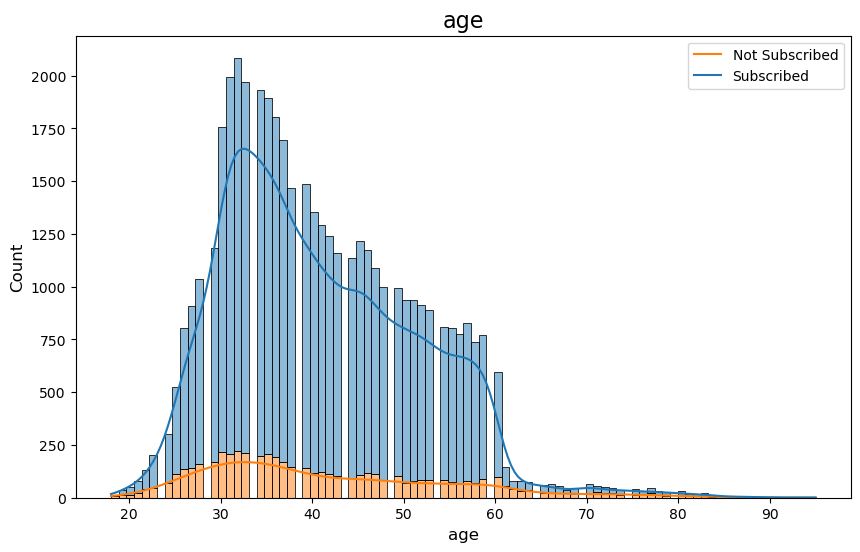

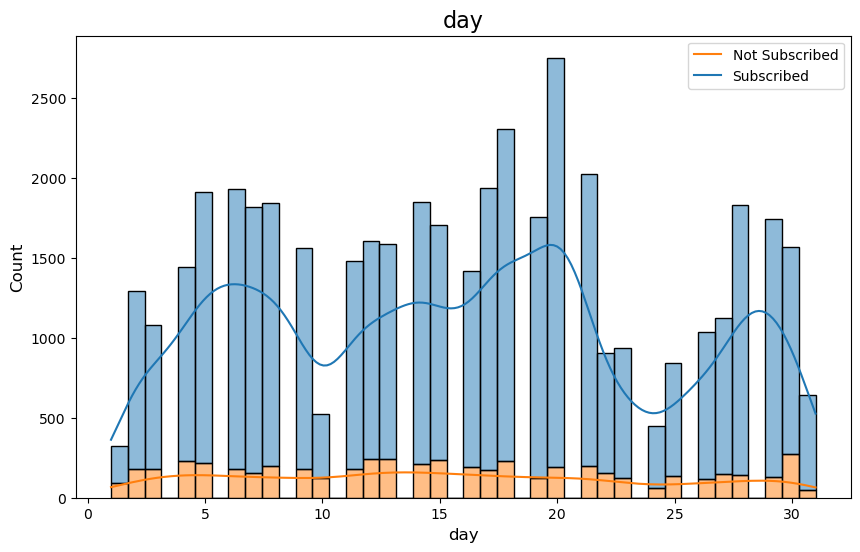

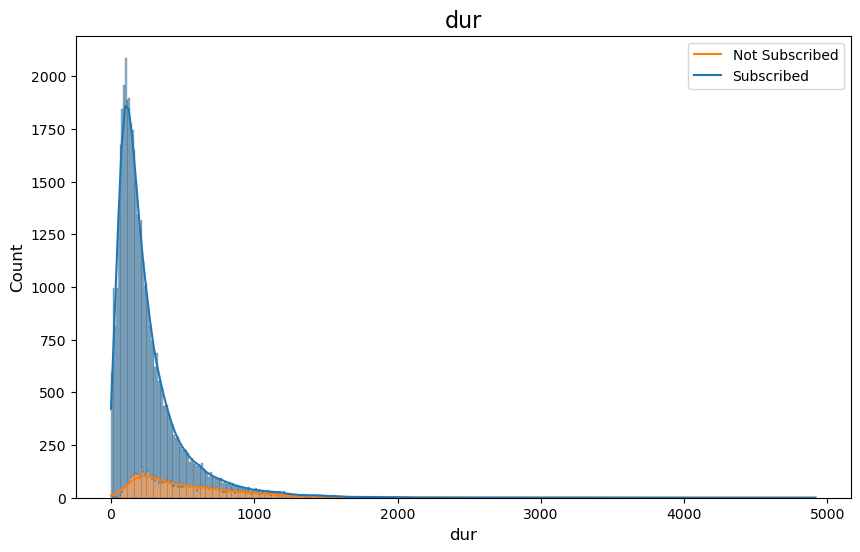

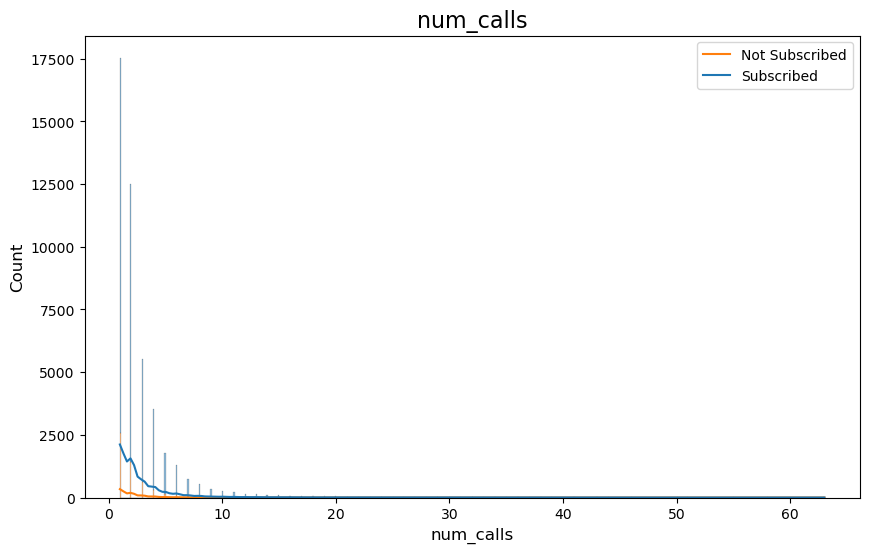

In [8]:
for feature in ['age', 'day', 'dur', 'num_calls']:
    plt.figure(figsize=(10,6))
    sns.histplot(x=feature, hue='y', data=data, kde=True, multiple='stack')
    plt.title(feature, fontsize=16)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.legend(["Not Subscribed", "Subscribed"])
    plt.show()

### Now, we will preprocess the data and encode the categorical features.

In [9]:
# Remove outliers
data = data[data['age'] > 0]
data = data[data['age'] < 100]
data = data[data['dur'] < 1000]

In [10]:
# Preprocessing the data
data.drop_duplicates(inplace=True)  # Removing duplicates
data.drop(['mon'], axis=1, inplace=True)  # Removing the month feature as it doesn't seem to be important
data['prev_outcome'] = data['prev_outcome'].replace(['unknown', 'other'], 'unknown/other')  # Combining similar categories

In [11]:
# Encoding the categorical features
cat_features = ['job', 'marital', 'education_qual', 'call_type', 'prev_outcome']
data_encoded = pd.get_dummies(data, columns=cat_features, drop_first=True)

In [12]:
# preprocessed final dataset
data_encoded.head()

,age,day,dur,num_calls,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,job_unknown,marital_married,marital_single,education_qual_secondary,education_qual_tertiary,education_qual_unknown,call_type_telephone,call_type_unknown,prev_outcome_success,prev_outcome_unknown/other
0,58.0,5.0,261.0,1.0,no,0,0,0,1,0,...,0,1,0,0,1,0,0,1,0,1
1,44.0,5.0,151.0,1.0,no,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,1
2,33.0,5.0,76.0,1.0,no,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,1
3,47.0,5.0,92.0,1.0,no,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,1
4,33.0,5.0,198.0,1.0,no,0,0,0,0,0,...,1,0,1,0,0,1,0,1,0,1


In [13]:
# Separating the features and target variable
X = data_encoded.drop(['y'], axis=1)
y = data_encoded['y']

### we will select the features that are most important for predicting the target variable and we will split the data to test and train. 

In [14]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [15]:
# Feature selection using Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X, y)
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

1. feature 2 (0.346553)
2. feature 0 (0.181997)
3. feature 1 (0.162822)
4. feature 22 (0.080394)
5. feature 3 (0.057435)
6. feature 21 (0.020313)
7. feature 23 (0.020084)
8. feature 15 (0.012476)
9. feature 17 (0.011662)
10. feature 12 (0.011440)
11. feature 20 (0.010324)
12. feature 7 (0.010290)
13. feature 16 (0.009536)
14. feature 18 (0.009395)
15. feature 4 (0.008284)
16. feature 10 (0.006875)
17. feature 11 (0.006388)
18. feature 8 (0.006035)
19. feature 19 (0.005982)
20. feature 13 (0.005732)
21. feature 9 (0.005526)
22. feature 5 (0.004643)
23. feature 6 (0.004174)
24. feature 14 (0.001641)


In [16]:
# Select the top 10 features
selected_features = indices[:10]
X = X[:, selected_features]

In [17]:
# Splitting the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#### from above graphs , it shows that, datset is imbalanced. the target class minority is 11% , which is moderate to extreme imbalance acoording to "[Google ML course](http://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data)". so we should downsample the majority target class. 
#### we are implementing downsampling, the reason is to balance the dataset and reduce the samples in 'No' target class. downsampling should be done only in training datas, this will give unbiased prediction and test data wont get affected due to data leakage.

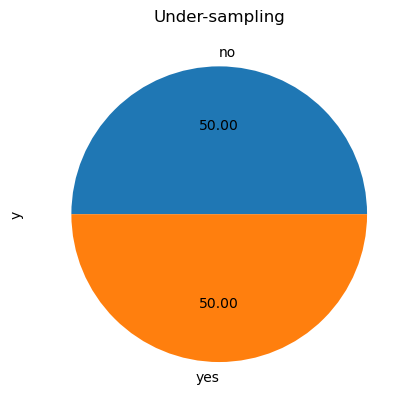

In [18]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=1) # Numerical value
# rus = RandomUnderSampler(sampling_strategy="not minority") # String
X_res, y_res = rus.fit_resample(X_train, y_train)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

In [19]:
y_res.value_counts()

no     3722
yes    3722
Name: y, dtype: int64

#### Training the model using various classifiers, they are 
*     Logistic Regression
*     KNeighbors Classifier (KNN)
*     DecisionTree Classifier
*     RandomForest Classifier
*     XG Boost Classifier
*     Naive Bayes Classifier

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import (accuracy_score,confusion_matrix,ConfusionMatrixDisplay,f1_score,classification_report)

### LogisticRegression 

In [21]:
lr = LogisticRegression()
lr.fit(X_res,y_res)
pred = lr.predict(X_test)
print(classification_report(y_test,pred))
probs_lr = lr.predict_proba(X_test)[:, 1]

              precision    recall  f1-score   support

          no       0.96      0.82      0.89      7898
         yes       0.33      0.73      0.45       931

    accuracy                           0.81      8829
   macro avg       0.65      0.78      0.67      8829
weighted avg       0.90      0.81      0.84      8829



#### K-Nearest Neighbors algorithm

In [22]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_res,y_res)
y_pred = knn.predict(X_test)
print(classification_report(y_test,y_pred))
probs_knn = knn.predict_proba(X_test)[:, 1]

              precision    recall  f1-score   support

          no       0.96      0.84      0.90      7898
         yes       0.34      0.68      0.45       931

    accuracy                           0.83      8829
   macro avg       0.65      0.76      0.67      8829
weighted avg       0.89      0.83      0.85      8829



#### Decision Tree Classifier

In [23]:
dtc = DecisionTreeClassifier()
dtc.fit(X_res,y_res)
pred1 = dtc.predict(X_test)
print(classification_report(y_test,pred1))
probs_dtc = dtc.predict_proba(X_test)[:, 1]

              precision    recall  f1-score   support

          no       0.96      0.74      0.84      7898
         yes       0.25      0.75      0.38       931

    accuracy                           0.74      8829
   macro avg       0.61      0.74      0.61      8829
weighted avg       0.89      0.74      0.79      8829



#### Random Forest Classifier

In [24]:
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_res,y_res)
pred2 = rfc.predict(X_test)
print(classification_report(y_test,pred2))
probs_rfc = rfc.predict_proba(X_test)[:, 1]

              precision    recall  f1-score   support

          no       0.98      0.78      0.86      7898
         yes       0.30      0.83      0.45       931

    accuracy                           0.78      8829
   macro avg       0.64      0.80      0.66      8829
weighted avg       0.90      0.78      0.82      8829



#### XGBClassifier

In [30]:
# Define the hyperparameters for the XGBoost classifier
params = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'seed': 42
}

# Instantiate the XGBoost classifier with the hyperparameters
model = XGBClassifier(**params)

# Convert 'no' and 'yes' to 0 and 1
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_res1 = le.fit_transform(y_res)
y_test1 = le.fit_transform(y_test)

# Fit the model to the training data
model.fit(X_res,y_res1)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Generate a classification report
print(classification_report(y_test1, y_pred))
y_pred_xgb = model.predict_proba(X_test)[:, 1]

              precision    recall  f1-score   support

           0       0.98      0.79      0.87      7898
           1       0.32      0.83      0.46       931

    accuracy                           0.79      8829
   macro avg       0.65      0.81      0.67      8829
weighted avg       0.91      0.79      0.83      8829



#### Naive bayes classifier
#### In the case of binary classification, where the target variable takes only two possible values, we can use **Bernoulli Naive Bayes**. This algorithm assumes that each feature is binary, meaning it takes only two possible values (e.g., 0 and 1), and calculates the conditional probabilities of each feature given the class label.

In [31]:
from sklearn.naive_bayes import BernoulliNB
# Instantiate the Bernoulli Naive Bayes classifier
clf = BernoulliNB()

# Fit the model to the training data
clf.fit(X_res, y_res)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Generate a classification report
print(classification_report(y_test, y_pred))
y_pred_nb = clf.predict_proba(X_test)[:, 1]

              precision    recall  f1-score   support

          no       0.96      0.74      0.84      7898
         yes       0.26      0.75      0.38       931

    accuracy                           0.74      8829
   macro avg       0.61      0.75      0.61      8829
weighted avg       0.89      0.74      0.79      8829



#### ROC_AUC_SCORE

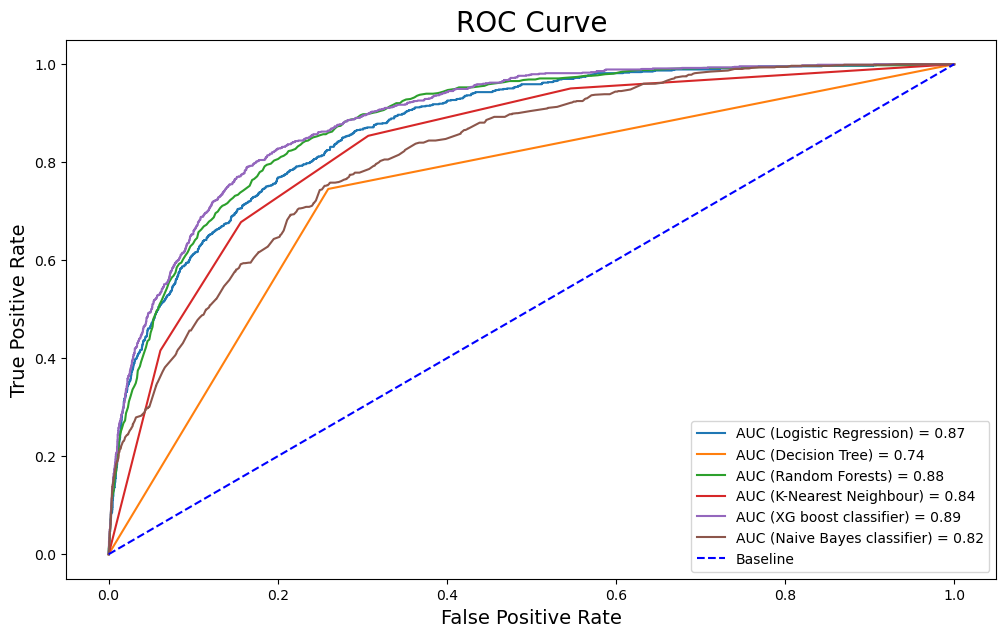

In [32]:
from sklearn.metrics import roc_auc_score, roc_curve

y_test_int = y_test.replace({'yes': 1, 'no': 0})
auc_lr = roc_auc_score(y_test_int, probs_lr)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test_int, probs_lr)

auc_knn = roc_auc_score(y_test_int, probs_knn)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test_int, probs_knn)

auc_dtc = roc_auc_score(y_test_int, probs_dtc)
fpr_dtc, tpr_dtc, thresholds_dtc = roc_curve(y_test_int, probs_dtc)

auc_rfc = roc_auc_score(y_test_int, probs_rfc)
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_test_int, probs_rfc)

auc_xgb = roc_auc_score(y_test_int, y_pred_xgb)
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test_int, y_pred_xgb)

auc_nb = roc_auc_score(y_test_int, y_pred_nb)
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test_int, y_pred_nb)

plt.figure(figsize=(12, 7))
plt.plot(fpr_lr, tpr_lr, label=f'AUC (Logistic Regression) = {auc_lr:.2f}')
plt.plot(fpr_dtc, tpr_dtc, label=f'AUC (Decision Tree) = {auc_dtc:.2f}')
plt.plot(fpr_rfc, tpr_rfc, label=f'AUC (Random Forests) = {auc_rfc:.2f}')
plt.plot(fpr_knn, tpr_knn, label=f'AUC (K-Nearest Neighbour) = {auc_knn:.2f}')
plt.plot(fpr_xgb, tpr_xgb, label=f'AUC (XG boost classifier) = {auc_xgb:.2f}')
plt.plot(fpr_nb, tpr_nb, label=f'AUC (Naive Bayes classifier) = {auc_nb:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend();

### Highest AUC - ROC score is XG boost classifier , 89%

### Conclusion
* we had imbalanced dataset, so we did undersampling to balance the train dataset and we used stratified sampling in the test data to ensure that the class distribution is representative of the overall population. 
* we did trained and predicted results using various classifiers. from the auc-roc score, XG boost classifier(89%) worked much better than other model.
* the test data after stratified sampling appears to be more balanced and representative of the overall population than the original test data.
* the stratified sampling has helped to mitigate the effects of class imbalance on the evaluation of the model's performance and has provided a more accurate assessment of the model's ability to generalize to new, unseen data.
 

#### The important features are contibuted in XGBoost Classifier. these features are important to detemine whether a customer will buy insurance or not.

In [42]:
X1 = data_encoded.drop(['y'], axis=1)
X1.columns

Index(['age', 'day', 'dur', 'num_calls', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_single',
       'education_qual_secondary', 'education_qual_tertiary',
       'education_qual_unknown', 'call_type_telephone', 'call_type_unknown',
       'prev_outcome_success', 'prev_outcome_unknown/other'],
      dtype='object')

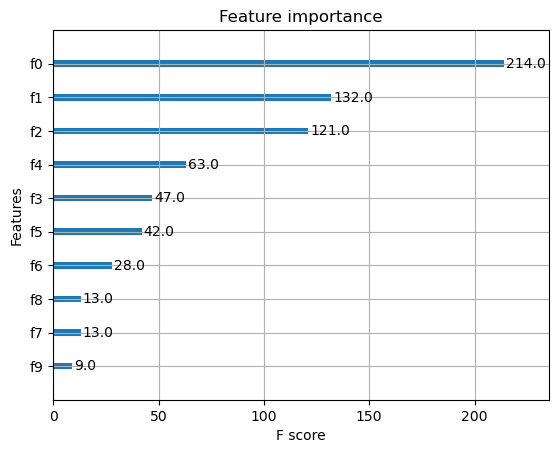

In [48]:
# Get the feature importance scores
xgb.plot_importance(model)
plt.show()

#### manually mapping the feature names with features shown in above graph,
* age = f0
* day = f1
* dur = f2
* num_calls = f3
* job_blue-collar = f4
* job_entrepreneur = f5
* job_housemaid = f6
* job_management = f7
* job_retired = f8
* job_self-employed = f9
#### here, Age of person, last contact day of the month , duration of call is most top rated features to select and filter the potentinal customer list.